### Notebook containing many of the first tests for isochrones.
### This currently includes all file opening tests, age and metallicity comparisons, fitting for the RGB - HGB jump

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as c
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import isochrones as iso
from scipy.signal import find_peaks
import filtermatch as fm

In [3]:
all_header, all_data = iso.open_create('/Users/simonsmith/Documents/Grad School/Alan Research/Girardi_Isochrones/1-13_02-0.dat')

In [4]:
all_header

array(['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL', 'logTe',
       'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'period2',
       'period3', 'period4', 'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc',
       'Xn', 'Xo', 'Cexcess', 'Z', 'mbolmag', 'u*mag', "g'mag", "r'mag",
       "i'mag", "z'ma"], dtype='<U7')

In [5]:
test_iso = all_data[2+(9)*13]

umag = np.array(test_iso[:, 28])
gmag = np.array(test_iso[:, 29])
rmag = np.array(test_iso[:, 31])
imag = np.array(test_iso[:, 30])
zmag = np.array(test_iso[:, 32])
test_iso[0, 1], np.round(10**test_iso[0, 2]/10**9)

(-2.0, 11.0)

In [6]:
uerr, gerr, rerr, ierr, zerr = 0.1077, 0.0843, 0.1181, 0.0349, 0.0141
test_err = 0.075

In [7]:
def iso_dist(blue, blue_name, red, red_name, dist):
    """
    For a pair of passbands and a distance, plot the isochrone at that distance
    """
    
    try: 
        dist.unit
    except AttributeError:
        return print('Please specify a unit')
    else:
        dist = dist.to(u.kpc)/u.kpc
        color = blue-red
        mag = red
     
    cut, diff = fm.find_jump(blue, red)
    
    mag = mag[:cut]
    color = color[:cut]
    
    fig = plt.figure(figsize=(6, 7))
    ax1 = fig.add_subplot(111)
    ax1.plot(color, mag+iso.dist_mod(dist), label=str(dist)+' kpc')
    plt.gca().invert_yaxis()
    
    ax1.set_ylabel('{}-band'.format(blue_name), fontsize=14)
    ax1.set_xlabel('{}-{}'.format(blue_name, red_name), fontsize=14)
    ax1.set_title('{} v {} Isochrone at {} kpc'.format(blue_name, red_name, dist))
    
    plt.show()
    
def iso_wid(blue, blue_name, red, red_name, wid):
    """
    For a pair of passbands and a width, plot the isochrone with a box around 
    it corresponding to assumed uncertainty in the colour. This width should
    approximately account for a small variance in age and metallicity
    """
    
    cut, diff = fm.find_jump(blue, red)
    
    color = blue-red
    mag = red
    mag = mag[:cut]
    color = color[:cut]
    
    fig = plt.figure(figsize=(6, 7))
    ax1 = fig.add_subplot(111)
    ax1.plot(color, mag)
    ax1.fill_betweenx(mag, color-wid, color+wid, alpha=0.3)
    plt.gca().invert_yaxis()
    
    ax1.set_ylabel('{}-band'.format(blue_name), fontsize=14)
    ax1.set_xlabel('{}-{}'.format(blue_name, red_name), fontsize=14)
    ax1.set_title('{} v {} Isochrone with a Width of {}'.format(blue_name, red_name, wid))
    
    plt.show()

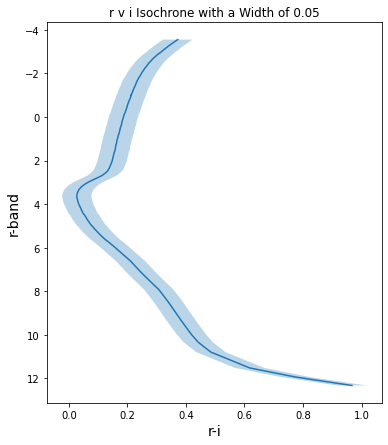

In [8]:
iso_wid(rmag, 'r', imag, 'i', 0.05)

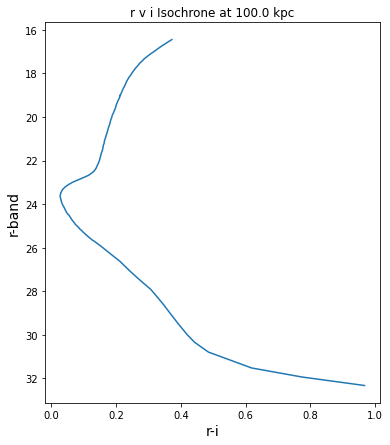

In [9]:
iso_dist(rmag, 'r', imag, 'i', 100*u.kpc)

In [71]:
dist = 100

In [76]:
'dist='.split('=')

['dist', '']

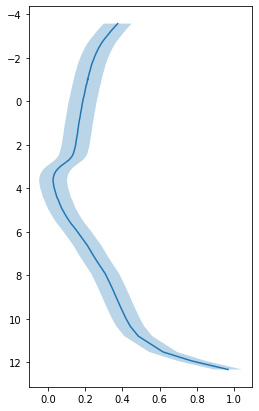

In [6]:
blue_mag, red_mag = rmag, imag
colour, mag = rmag-imag, imag

mag_err = ierr
col_err = np.sqrt(rerr**2+ierr**2)
int_wid = 0.1



cut, diff = fm.find_jump(blue_mag, red_mag)
pre_col, pre_mag = colour[:cut+1], mag[:cut+1]
err = 0.0349


plt.figure(figsize=(4, 7))
plt.plot(pre_col, pre_mag)
plt.fill_betweenx(pre_mag, pre_col-test_err, pre_col+test_err, alpha=0.3)
#plt.fill_between(pre_col, pre_mag-mag_err, pre_mag+mag_err, alpha=0.3)


#plt.ylim([7, -3])
#plt.xlim([-0.25, 0.75])
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#give box intrinsic width to account for variation in age, metallicity
#test on old and metal poor

ideas for selecting stars in the box:
treat it as a discrete problem. take a small magnitude sliver and assume constant width of the box (corresponding to width of the box at that point). take all stars in that small box (which my functions should easily be able to do) and append them into the return lists

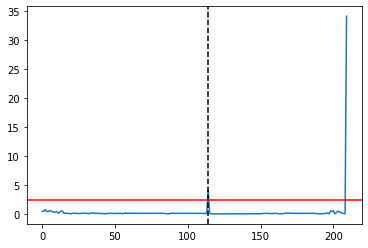

In [48]:
peak = find_peaks(diff, height=2)

plt.plot(diff)
plt.axvline(peak[0][0], ls='--', c='k')
plt.axhline(np.std(diff), ls='-', c='r')
plt.show()

#np.std(diff)

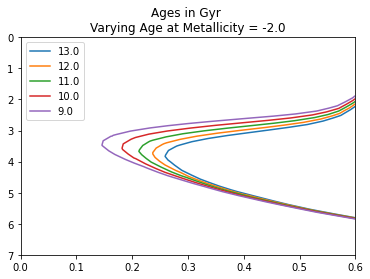

In [34]:
d = 9
a = 13*d

for i in all_data[a:a+5]:
    umag = np.array(i[:, 28])
    gmag = np.array(i[:, 29])
    rmag = np.array(i[:, 31])
    imag = np.array(i[:, 30])
    zmag = np.array(i[:, 32])
    
    blue_mag, red_mag = gmag, imag
    cut, diff = fm.find_jump(blue_mag, red_mag)
    
    plt.plot((blue_mag-red_mag)[:cut+1], red_mag[:cut+1], label=str(np.round(10**i[0][2]/10**9)))
    m = i[0][1]
#plt.xlim([-1.5, 3])
#plt.ylim([13, -4])
plt.xlim([-0.0, 0.6])
plt.ylim([7, 0])
plt.title('Ages in Gyr \nVarying Age at Metallicity = '+str(m))
plt.legend()
plt.show()

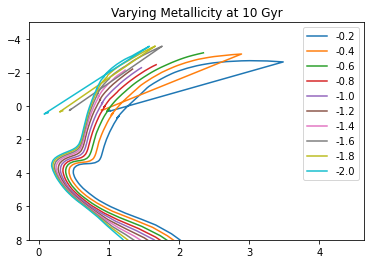

In [24]:
m = 3

for i in all_data[m::13]:
    gmag = np.array(i[:-90, 29])
    rmag = np.array(i[:-90, 30])
    plt.plot((gmag-rmag), rmag, label=str(i[0][1]))
    a = i[0][2]
    #print(np.round(10**i[0][2]/10**9))
#plt.xlim(0, 2)
plt.ylim([8, -5])
plt.title('Varying Metallicity at '+str(int(np.round(10**i[0][2]/10**9)))+' Gyr')
plt.legend()
plt.show()

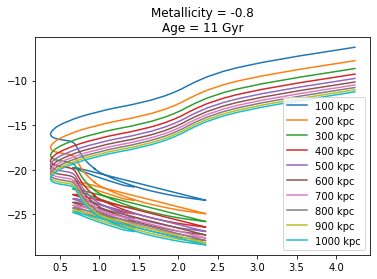

In [25]:
test_iso = all_data[40]
gmag = np.array(test_iso[:-10, 29])
rmag = np.array(test_iso[:-10, 30])

dists = np.arange(100, 1100, 100)
for d in dists:
    plt.plot((gmag-rmag), rmag-iso.dist_mod(d), label=str(d)+' kpc')
metal = test_iso[0][1]
age = test_iso[0][2]
plt.title('Metallicity = '+str(metal)+'\nAge = '+str(int(10**age/10**9))+' Gyr')
plt.legend()
plt.show()